# **D213 TASK 1 | Time Series Analysis** 

## **Import libraries and read in data into dataframe**

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
from statsmodels.tsa.arima.model import ARIMA

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_predict

In [5]:
df = pd.read_csv('teleco_time_series .csv')

In [6]:
copy_df = df.copy()

In [7]:
df.head()

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554


## **Explore data**

In [8]:
df.shape

(731, 2)

<Axes: xlabel='Day', ylabel='Revenue'>

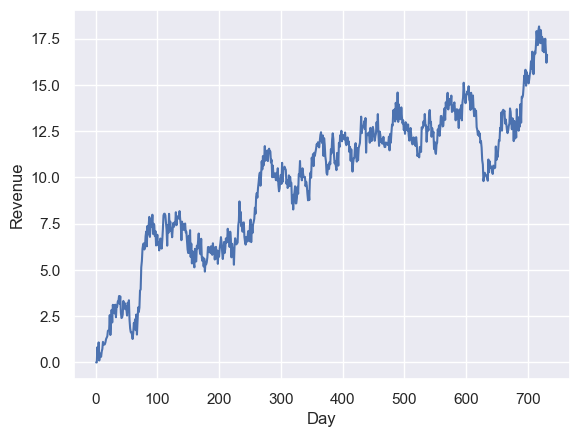

In [9]:
sns.set(style = 'darkgrid')
sns.lineplot(data=df, x="Day", y="Revenue")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.5 KB


In [11]:
df.isna().sum()

Day        0
Revenue    0
dtype: int64

In [12]:
df.describe()

,Day,Revenue
count,731.000000,731.000000
mean,366.000000,9.822901
std,211.165812,3.852645
min,1.000000,0.000000
25%,183.500000,6.872836
50%,366.000000,10.785571
75%,548.500000,12.566911
max,731.000000,18.154769


In [13]:
from datetime import datetime

In [14]:
df['Date'] = pd.date_range(start=datetime(2021, 1, 1), periods=df.shape[0], freq='24H')

df.set_index('Date', inplace=True)

df.head()

,Day,Revenue
Date,,
2021-01-01,1,0.000000
2021-01-02,2,0.000793
2021-01-03,3,0.825542
2021-01-04,4,0.320332
2021-01-05,5,1.082554


In [15]:
df.drop(columns=['Day'], inplace=True)
df.head()

,Revenue
Date,
2021-01-01,0.000000
2021-01-02,0.000793
2021-01-03,0.825542
2021-01-04,0.320332
2021-01-05,1.082554


In [16]:
df.tail()

,Revenue
Date,
2022-12-28,16.931559
2022-12-29,17.490666
2022-12-30,16.803638
2022-12-31,16.194813
2023-01-01,16.620798


## **Line Graph**

In [17]:
from matplotlib import pyplot as plt

[Text(0.5, 0, 'Date 2021-2022'),
 Text(0, 0.5, 'Revenue (millions USD)'),
 Text(0.5, 1.0, 'Revenue for 2021-2022')]

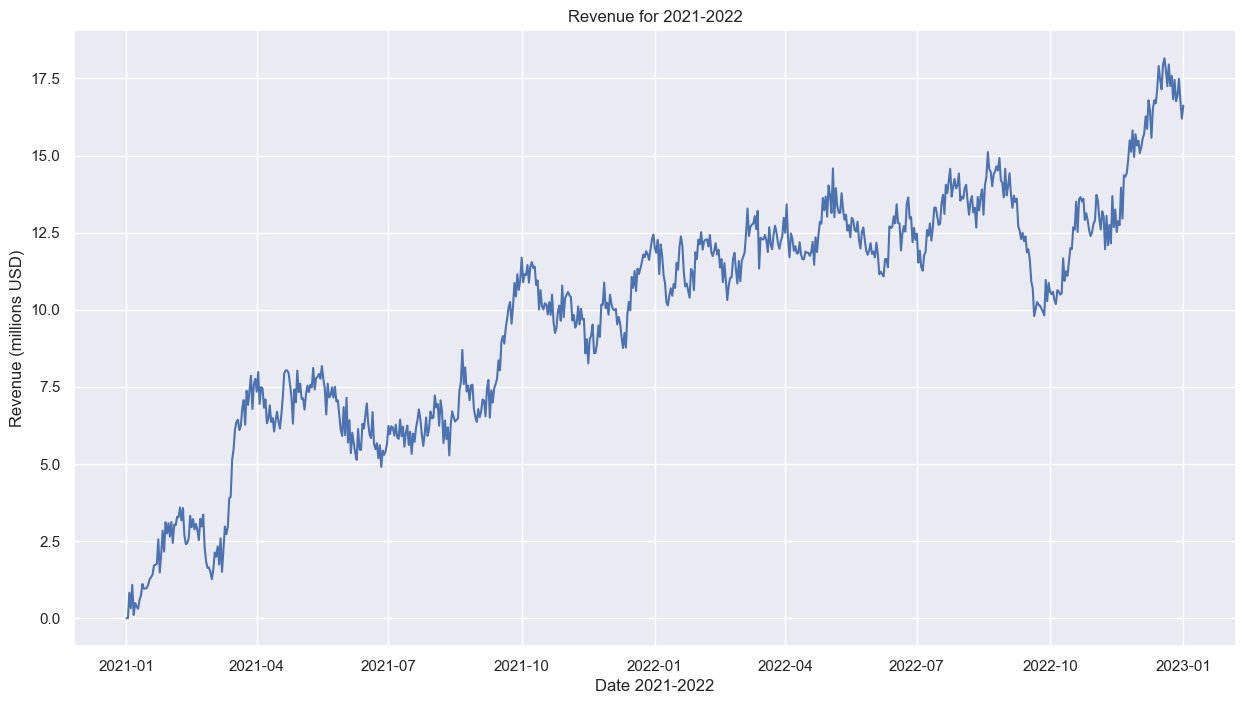

In [18]:
plt.figure(figsize=(15,8))
sns.set(style = 'darkgrid')
ax = sns.lineplot(data=df, x="Date", y="Revenue")
ax.set(xlabel='Date 2021-2022', ylabel='Revenue (millions USD)', title='Revenue for 2021-2022')

## **Train/Test Split**

In [19]:
X_train = df.loc[:'2022-09-30']
X_test = df.loc['2022-10-01':]

print('X_train Shape', X_train.shape)
print('X_test Shape', X_test.shape)

X_train Shape (638, 1)
X_test Shape (93, 1)


## **Stationarity**

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
result = adfuller(df['Revenue'])
print("Test Statistics: ", result[0])
print("p-value: ", result[1])
print("Critical Values: ", result[4])

Test Statistics:  -1.9246121573101809
p-value:  0.32057281507939783
Critical Values:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}


In [22]:
#null hypothesis: time series is non-stationary
#alternative hypothesis: time series is stationary

if result[1] <= 0.05:
    print("Reject the null hypothesis, the time series is stationary.")
else:
    print("Fail to reject the null hypothesis, the time series is non-stationary.")

Fail to reject the null hypothesis, the time series is non-stationary.


## **Difference the Data**
### (make the data stationary)

first order of differencing

In [23]:
df_stationary = df.diff().dropna() #differenced the data
df_stationary.head()

,Revenue
Date,
2021-01-02,0.000793
2021-01-03,0.824749
2021-01-04,-0.505210
2021-01-05,0.762222
2021-01-06,-0.974900


In [24]:
result = adfuller(df_stationary['Revenue'])
print("Test Statistics: ", result[0])
print("p-value: ", result[1])
print("Critical Values: ", result[4])

#null hypothesis: time series is non-stationary
#alternative hypothesis: time series is stationary

if result[1] <= 0.05:
    print("Reject the null hypothesis, the time series is stationary.")
else:
    print("Fail to reject the null hypothesis, the time series is non-stationary.")

Test Statistics:  -44.874527193875984
p-value:  0.0
Critical Values:  {'1%': -3.4393520240470554, '5%': -2.8655128165959236, '10%': -2.5688855736949163}
Reject the null hypothesis, the time series is stationary.


### **data is now stationary**

## **Spectral Density**

In [25]:
from scipy import signal  # Import the signal module from scipy

(array([6.97387711e+03, 3.91439441e+03, 5.47611144e+01, 1.10791953e+01,
        4.25439684e+00, 8.90767103e+00, 9.32436541e+00, 5.07699490e+00,
        4.50820186e+00, 1.97142105e+00, 3.17930644e+00, 2.05465010e+00,
        1.27856111e-01, 9.12357670e-01, 1.58928494e+00, 1.82600308e+00,
        1.37345831e+00, 1.08602805e+00, 3.71664573e-01, 4.01447712e-01,
        6.67019362e-01, 4.28134847e-01, 1.08303874e+00, 5.05461139e-01,
        1.49612021e-01, 2.01156666e-01, 2.01929017e-01, 3.62482513e-02,
        4.74386760e-01, 5.46619399e-01, 2.44460915e-01, 4.75225583e-01,
        2.85007556e-01, 7.59631735e-02, 2.43183009e-01, 7.19503505e-02,
        3.60475608e-01, 2.18971480e-01, 1.23421972e-01, 1.69234109e-01,
        1.69371921e-01, 1.14748035e-01, 2.14144408e-01, 2.82736486e-01,
        3.17059554e-02, 1.62458482e-02, 3.98324693e-02, 6.38895068e-02,
        4.57061837e-02, 6.54718394e-02, 1.72598760e-01, 1.32802101e-01,
        6.74716970e-02, 1.61089989e-02, 1.42266347e-01, 1.236409

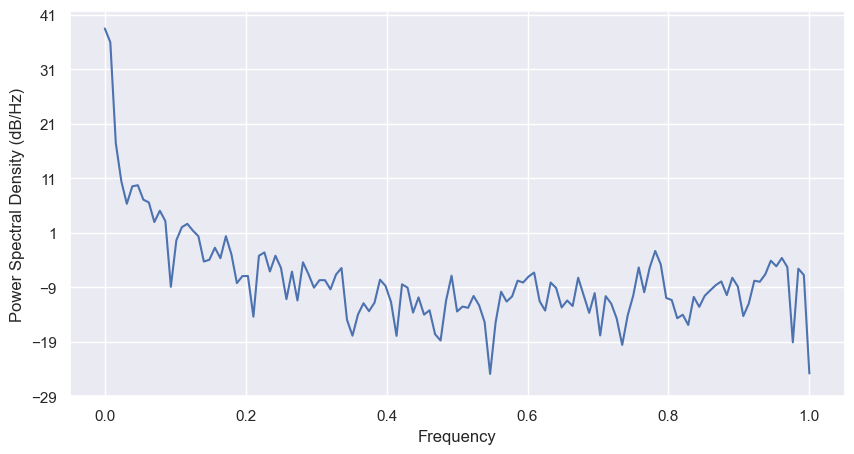

In [26]:
#using non-stationary dataframe here

plt.figure(figsize=(10,5), linewidth=3)
plt.psd(df['Revenue'])

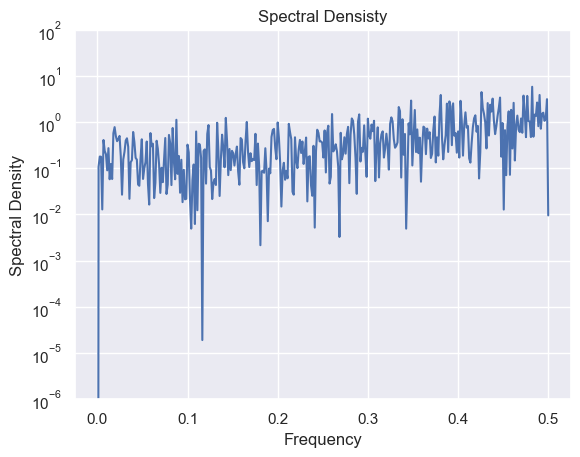

In [27]:
#using stationary dataframe here

f, Pxx_den = signal.periodogram(df_stationary['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim([1e-6, 1e2])
plt.title("Spectral Densisty")
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

## **Seasonality in Subset of Data**

<Axes: xlabel='Date'>

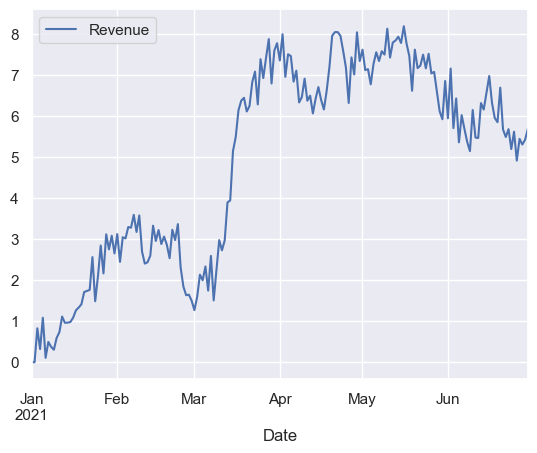

In [28]:
df.loc[:'2021-06-30'].plot()

<Axes: xlabel='Date'>

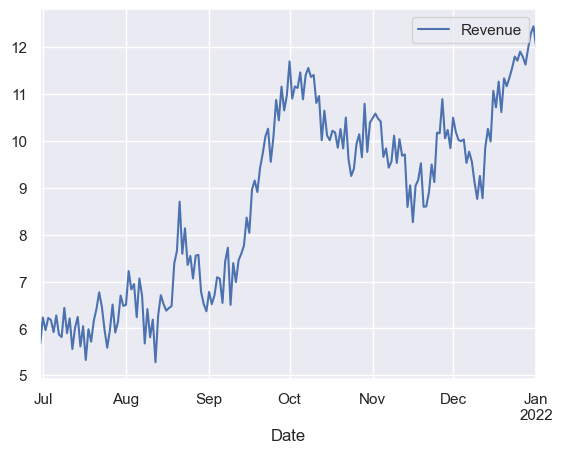

In [29]:
df.loc['2021-06-30':'2022-01-01'].plot()

## **Decomposition**

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

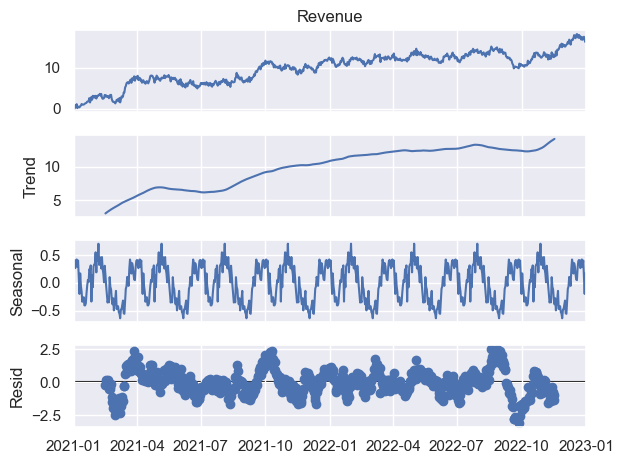

In [31]:
decomp = seasonal_decompose(df['Revenue'], period=90) #seasonality has 90 days of cyclicality

#plot decomposition
decomp.plot()
plt.show()

<Axes: title={'center': 'Seasonality (Non-stationary data)'}, xlabel='Date'>

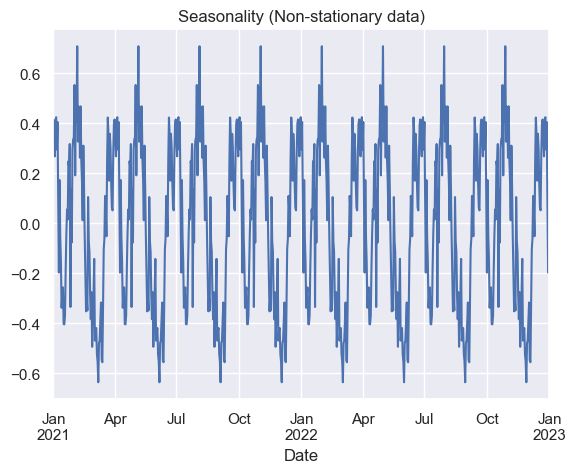

In [32]:
plt.title('Seasonality (Non-stationary data)')
decomp.seasonal.plot()

<Axes: title={'center': 'Trend (Non-stationary data)'}, xlabel='Date'>

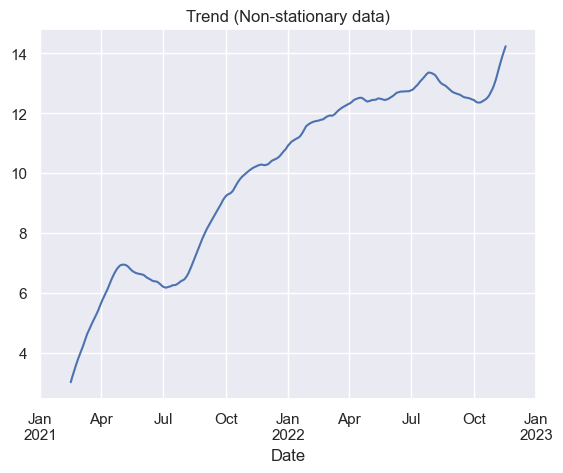

In [33]:
plt.title('Trend (Non-stationary data)')
decomp.trend.plot()

<Axes: title={'center': 'Residuals (Non-stationary data)'}, xlabel='Date'>

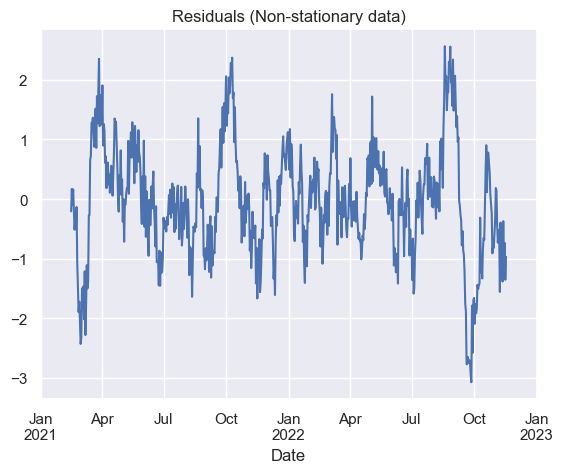

In [34]:
plt.title('Residuals (Non-stationary data)')
decomp.resid.plot()

In [35]:
# residual confirms the lack of trend

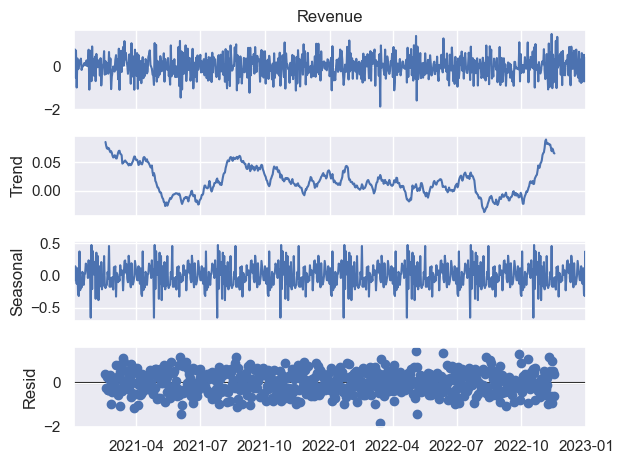

In [36]:
decomp2 = seasonal_decompose(df_stationary['Revenue'], period=90) #seasonality has 90 days of cyclicality

#plot decomposition
decomp2.plot()
plt.show()

<Axes: title={'center': 'Seasonality (Stationary data)'}, xlabel='Date'>

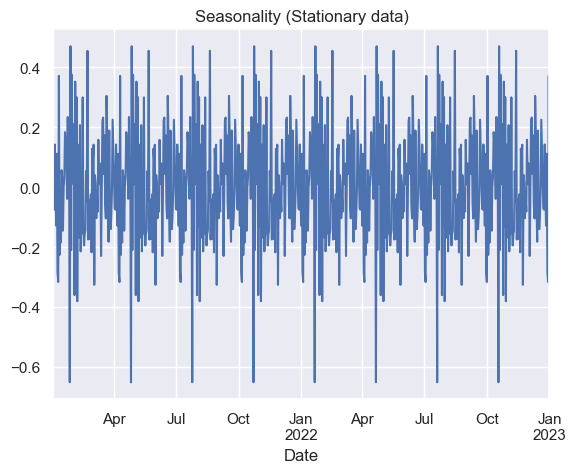

In [37]:
plt.title('Seasonality (Stationary data)')
decomp2.seasonal.plot()

<Axes: title={'center': 'Trend (Stationary data)'}, xlabel='Date'>

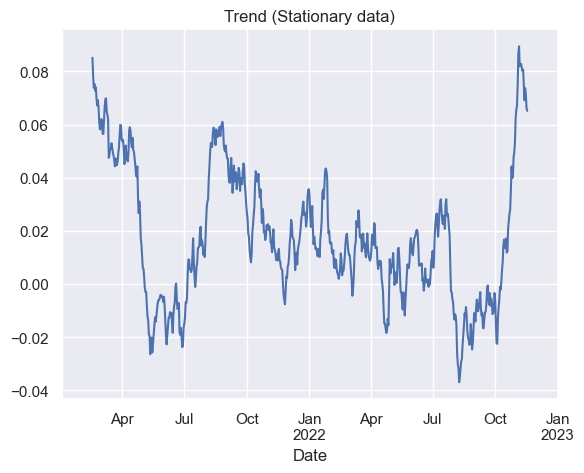

In [38]:
plt.title('Trend (Stationary data)')
decomp2.trend.plot()

<Axes: title={'center': 'Residual (Stationary data)'}, xlabel='Date'>

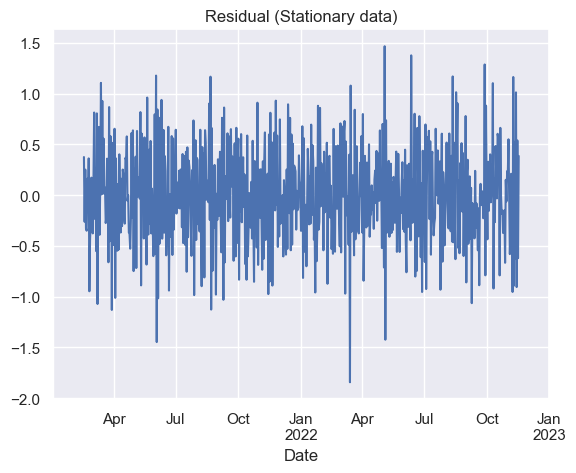

In [39]:
plt.title('Residual (Stationary data)')
decomp2.resid.plot()

## **Look for Seasonality**
### autocorrelation plot of a non-stationary dataset

In [40]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

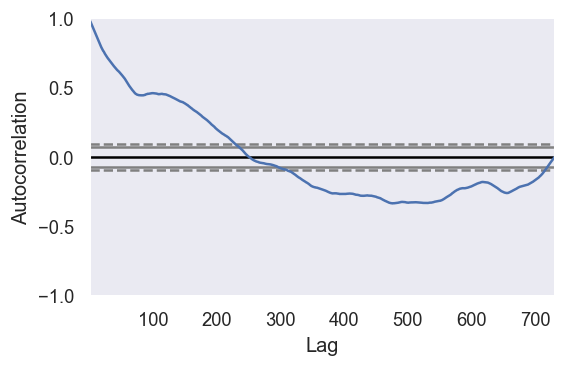

In [41]:
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})
autocorrelation_plot(df.Revenue.tolist())

## **Autocorrelation Function Graph**
### graphing ACF on non-stationary data

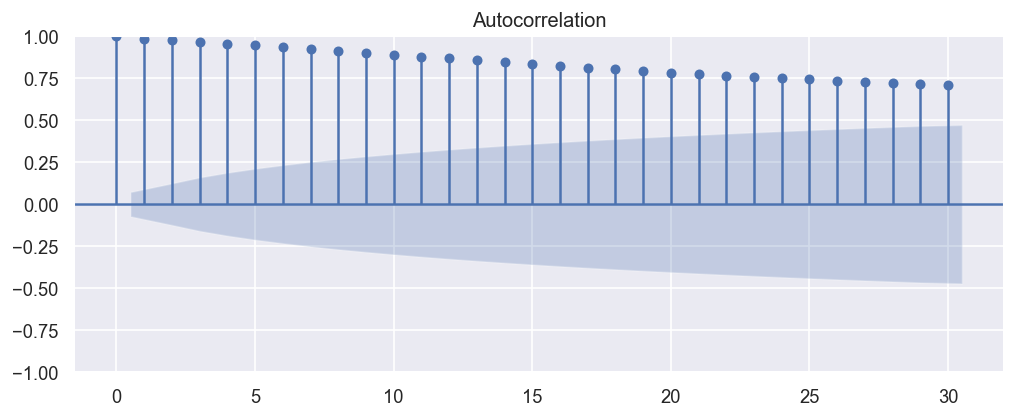

In [42]:
#grpahing the ACF plot

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.Revenue, lags=30, ax=ax1) # @ 30 lags


<function matplotlib.pyplot.show(close=None, block=None)>

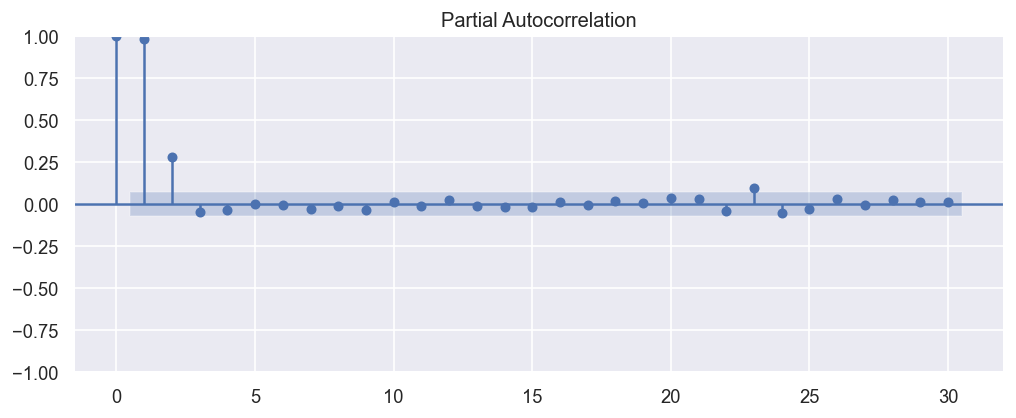

In [43]:
#graphing the PACF plot

fig = plt.figure(figsize=(10,8))
ax2 = fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df.Revenue, lags=30, ax=ax2) # @ 30 lags
plt.show

### graphing ACF and PACF on stationary data

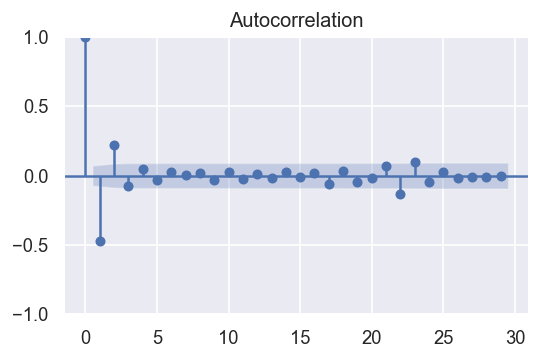

In [44]:
plot_acf(df_stationary)
#plot_pacf(df_stationary)
plt.show()

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf

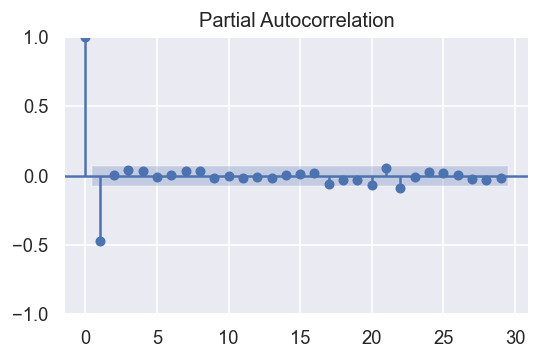

In [46]:
plot_pacf(df_stationary)
plt.show()

## **Split the stationary data**

In [47]:
X_train_s = df_stationary.loc[:'2022-09-30']
X_test_s = df_stationary.loc['2022-10-01':]

print('X_train_s Shape', X_train.shape)
print('X_test_s Shape', X_test.shape)

X_train_s Shape (638, 1)
X_test_s Shape (93, 1)


## Export datasets

## **ARIMA**

### auto_arima

In [48]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [49]:
model_auto = auto_arima(df['Revenue'], trace=True, suppress_warnings=True)
model_auto.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=987.305, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1162.819, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=983.122, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1019.369, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1162.139, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=985.104, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=985.106, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=986.045, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=984.710, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.235 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -488.561
Date:                Tue, 05 Mar 2024   AIC                            983.122
Time:                        18:06:02   BIC                            996.901
Sample:                    01-01-2021   HQIC                           988.438
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0332      0.018      1.895      0.058      -0.001       0.068
ar.L1         -0.4692      0.033    -14.296      0.000      -0.534      -0.405
sigma2         0.2232      0.013     17.801      0.000       0.199       0.248
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.05
Prob(Q):                              0.96   Prob(JB):                         0.36
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### manual arima

In [50]:
model_manual = ARIMA(df['Revenue'], order=(1,1,0))
model_manual = model_manual.fit()
model_manual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  731
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -490.355
Date:                Tue, 05 Mar 2024   AIC                            984.710
Time:                        18:06:02   BIC                            993.896
Sample:                    01-01-2021   HQIC                           988.254
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4667      0.033    -14.213      0.000      -0.531      -0.402
sigma2         0.2243      0.013     17.782      0.000       0.200       0.249
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.07
Prob(Q):                              0.98   Prob(JB):                         0.36
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
model_manual_2 = ARIMA(df['Revenue'], order=(2,1,0))
model_manual_2 = model_manual_2.fit()
model_manual_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  731
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -490.320
Date:                Tue, 05 Mar 2024   AIC                            986.641
Time:                        18:06:03   BIC                           1000.420
Sample:                    01-01-2021   HQIC                           991.957
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4621      0.037    -12.472      0.000      -0.535      -0.389
ar.L2          0.0098      0.036      0.270      0.787      -0.061       0.081
sigma2         0.2243      0.013     17.760      0.000       0.200       0.249
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.87   Prob(JB):                         0.35
Heteroskedasticity (H):               1.02   Skew:                            -0.02
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model_manual_3 = ARIMA(df['Revenue'], order=(2,1,1))
model_manual_3 = model_manual_3.fit()
model_manual_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  731
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -489.428
Date:                Tue, 05 Mar 2024   AIC                            986.856
Time:                        18:06:03   BIC                           1005.228
Sample:                    01-01-2021   HQIC                           993.944
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3234      0.287      1.126      0.260      -0.239       0.886
ar.L2          0.3936      0.127      3.096      0.002       0.144       0.643
ma.L1         -0.7772      0.297     -2.617      0.009      -1.359      -0.195
sigma2         0.2237      0.013     17.613      0.000       0.199       0.249
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 2.13
Prob(Q):                              0.67   Prob(JB):                         0.34
Heteroskedasticity (H):               1.02   Skew:                            -0.03
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
model_manual_4 = ARIMA(df['Revenue'], order=(1,0,0))
model_manual_4 = model_manual_4.fit()
model_manual_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  731
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -582.531
Date:                Tue, 05 Mar 2024   AIC                           1171.061
Time:                        18:06:03   BIC                           1184.844
Sample:                    01-01-2021   HQIC                          1176.379
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4634      2.606      3.632      0.000       4.357      14.570
ar.L1          0.9945      0.004    243.683      0.000       0.986       1.002
sigma2         0.2864      0.016     17.783      0.000       0.255       0.318
===================================================================================
Ljung-Box (L1) (Q):                 159.77   Jarque-Bera (JB):                 2.13
Prob(Q):                              0.00   Prob(JB):                         0.35
Heteroskedasticity (H):               1.02   Skew:                            -0.03
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Best parameters for ARIMA are (1, 1, 0) from auto_arima**

## **TRAINING DATA**
### Auto Arima

In [54]:
model_train_1 = auto_arima(X_train['Revenue'], trace=True, suppress_warnings=True)
model_train_1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=849.940, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=990.877, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=845.820, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=874.381, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=989.550, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=847.765, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=847.775, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=849.047, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=845.551, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=847.461, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=847.478, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=874.373, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=848.504, Time=0.15 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.335 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  638
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -420.775
Date:                Tue, 05 Mar 2024   AIC                            845.551
Time:                        18:06:04   BIC                            854.464
Sample:                    01-01-2021   HQIC                           849.011
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4526      0.035    -12.911      0.000      -0.521      -0.384
sigma2         0.2193      0.013     16.570      0.000       0.193       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.03
Prob(Q):                              0.96   Prob(JB):                         0.36
Heteroskedasticity (H):               1.01   Skew:                            -0.04
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Manual ARIMA 

In [55]:
model_train_2 = ARIMA(X_train['Revenue'], order=(1, 1, 0)) # p, d, q from auto_arima
model_train_2 = model_train_2.fit()
model_train_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  638
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -420.775
Date:                Tue, 05 Mar 2024   AIC                            845.551
Time:                        18:06:05   BIC                            854.464
Sample:                    01-01-2021   HQIC                           849.011
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4526      0.035    -12.911      0.000      -0.521      -0.384
sigma2         0.2193      0.013     16.570      0.000       0.193       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.03
Prob(Q):                              0.96   Prob(JB):                         0.36
Heteroskedasticity (H):               1.01   Skew:                            -0.04
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
model_train_3 = ARIMA(X_train['Revenue'], order=(2, 1, 1)) # p, d, q from auto_arima
model_train_3 = model_train_3.fit()
model_train_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  638
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -420.252
Date:                Tue, 05 Mar 2024   AIC                            848.504
Time:                        18:06:05   BIC                            866.331
Sample:                    01-01-2021   HQIC                           855.425
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2925      0.439      0.667      0.505      -0.567       1.152
ar.L2          0.3592      0.190      1.895      0.058      -0.012       0.731
ma.L1         -0.7339      0.449     -1.636      0.102      -1.613       0.146
sigma2         0.2190      0.013     16.405      0.000       0.193       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.22
Prob(Q):                              0.79   Prob(JB):                         0.33
Heteroskedasticity (H):               1.01   Skew:                            -0.05
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
model_train_4 = ARIMA(X_train['Revenue'], order=(1, 1, 2)) # p, d, q from auto_arima
model_train_4 = model_train_4.fit()
model_train_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  638
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -419.874
Date:                Tue, 05 Mar 2024   AIC                            847.748
Time:                        18:06:05   BIC                            865.575
Sample:                    01-01-2021   HQIC                           854.669
                         - 09-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3028      0.166     -1.820      0.069      -0.629       0.023
ma.L1         -0.1441      0.168     -0.860      0.390      -0.472       0.184
ma.L2          0.1016      0.079      1.279      0.201      -0.054       0.257
sigma2         0.2187      0.013     16.320      0.000       0.192       0.245
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.93   Prob(JB):                         0.26
Heteroskedasticity (H):               1.01   Skew:                            -0.06
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Best Parameters for ARIMA on training data: (1, 1, 0)**

## **TESTING DATA**
### Auto ARIMA

In [58]:
model_test_1 = auto_arima(X_test['Revenue'], trace=True, suppress_warnings=True)
model_test_1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=143.398, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=171.250, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=139.246, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=146.022, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=170.343, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=141.030, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=140.997, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=142.995, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=140.859, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.366 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   93
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -66.623
Date:                Tue, 05 Mar 2024   AIC                            139.246
Time:                        18:06:05   BIC                            146.811
Sample:                    10-01-2022   HQIC                           142.299
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1006      0.052      1.936      0.053      -0.001       0.203
ar.L1         -0.5536      0.097     -5.727      0.000      -0.743      -0.364
sigma2         0.2482      0.040      6.270      0.000       0.171       0.326
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.75   Prob(JB):                         0.91
Heteroskedasticity (H):               1.65   Skew:                            -0.02
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Manual ARIMA - test data

In [59]:
model_test_2 = ARIMA(X_test['Revenue'], order=(1, 1, 2)) # p, d, q from auto_arima
model_test_2 = model_test_2.fit()
model_test_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   93
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -66.997
Date:                Tue, 05 Mar 2024   AIC                            141.994
Time:                        18:06:05   BIC                            152.081
Sample:                    10-01-2022   HQIC                           146.065
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2296      0.293      0.784      0.433      -0.344       0.803
ma.L1         -0.8097      0.252     -3.215      0.001      -1.303      -0.316
ma.L2          0.4345      0.124      3.511      0.000       0.192       0.677
sigma2         0.2499      0.038      6.505      0.000       0.175       0.325
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.72   Prob(JB):                         0.98
Heteroskedasticity (H):               1.49   Skew:                            -0.02
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
model_test_3 = ARIMA(X_test['Revenue'], order=(2, 1, 1)) # p, d, q from auto_arima
model_test_3 = model_test_3.fit()
model_test_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   93
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -67.749
Date:                Tue, 05 Mar 2024   AIC                            143.498
Time:                        18:06:05   BIC                            153.586
Sample:                    10-01-2022   HQIC                           147.570
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3621      0.235      1.541      0.123      -0.099       0.823
ar.L2          0.5243      0.120      4.382      0.000       0.290       0.759
ma.L1         -0.8808      0.245     -3.592      0.000      -1.361      -0.400
sigma2         0.2542      0.040      6.403      0.000       0.176       0.332
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.57   Prob(JB):                         0.96
Heteroskedasticity (H):               1.59   Skew:                            -0.02
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
model_test_4 = ARIMA(X_test['Revenue'], order=(1, 1, 1)) # p, d, q from auto_arima
model_test_4 = model_test_4.fit()
model_test_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -68.427
Date:                Tue, 05 Mar 2024   AIC                            142.855
Time:                        18:06:05   BIC                            150.420
Sample:                    10-01-2022   HQIC                           145.908
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5274      0.172     -3.058      0.002      -0.865      -0.189
ma.L1         -0.0128      0.234     -0.055      0.956      -0.471       0.446
sigma2         0.2582      0.041      6.306      0.000       0.178       0.338
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.65   Prob(JB):                         0.89
Heteroskedasticity (H):               1.52   Skew:                            -0.01
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **Best parameters for testing data: (1, 1, 0)**

## **ARIMA Result for Selected Order**

In [103]:
model = ARIMA(df['Revenue'], order=(1,1,0), seasonal_order=(5, 1, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                          Revenue   No. Observations:                  731
Model:             ARIMA(1, 1, 0)x(5, 1, 0, 12)   Log Likelihood                -536.240
Date:                          Wed, 06 Mar 2024   AIC                           1086.481
Time:                                  15:45:18   BIC                           1118.516
Sample:                              01-01-2021   HQIC                          1098.850
                                   - 01-01-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4778      0.034    -14.115      0.000      -0.544      -0.411
ar.S.L12      -0.8593      0.039    -22.156      0.000      -0.935      -0.783
ar.S.L24      -0.7060      0.052    -13.602      0.000      -0.808      -0.604
ar.S.L36      -0.4675      0.058     -8.085      0.000      -0.581      -0.354
ar.S.L48      -0.3023      0.050     -6.028      0.000      -0.401      -0.204
ar.S.L60      -0.1678      0.039     -4.318      0.000      -0.244      -0.092
sigma2         0.2561      0.015     17.420      0.000       0.227       0.285
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.96   Prob(JB):                         0.34
Heteroskedasticity (H):               1.09   Skew:                            -0.00
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **PREDICTIONS**

In [104]:
#sample forecast

results.forecast(90)

2023-01-02    16.594642
2023-01-03    16.201729
2023-01-04    16.417148
2023-01-05    16.375852
2023-01-06    16.497566
                ...    
2023-03-28    19.810484
2023-03-29    20.022815
2023-03-30    20.119597
2023-03-31    20.079046
2023-04-01    20.038105
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

In [105]:
# index future dates

index_future_dates = pd.date_range(start='2023-01-02', end='2023-03-31')
print(index_future_dates)

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
               '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02',
               '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06',
               '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10',
               '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14',
               '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18',
               '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22',
               '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26',
      

In [106]:
prediction = pd.DataFrame(results.predict(n_periods=12), index=df.index)
prediction.columns = ['Revenue']
prediction

,Revenue
Date,
2021-01-01,0.000000
2021-01-02,0.000000
2021-01-03,0.000793
2021-01-04,0.825542
2021-01-05,0.320333
...,...
2022-12-28,17.292461
2022-12-29,16.927714
2022-12-30,17.677528


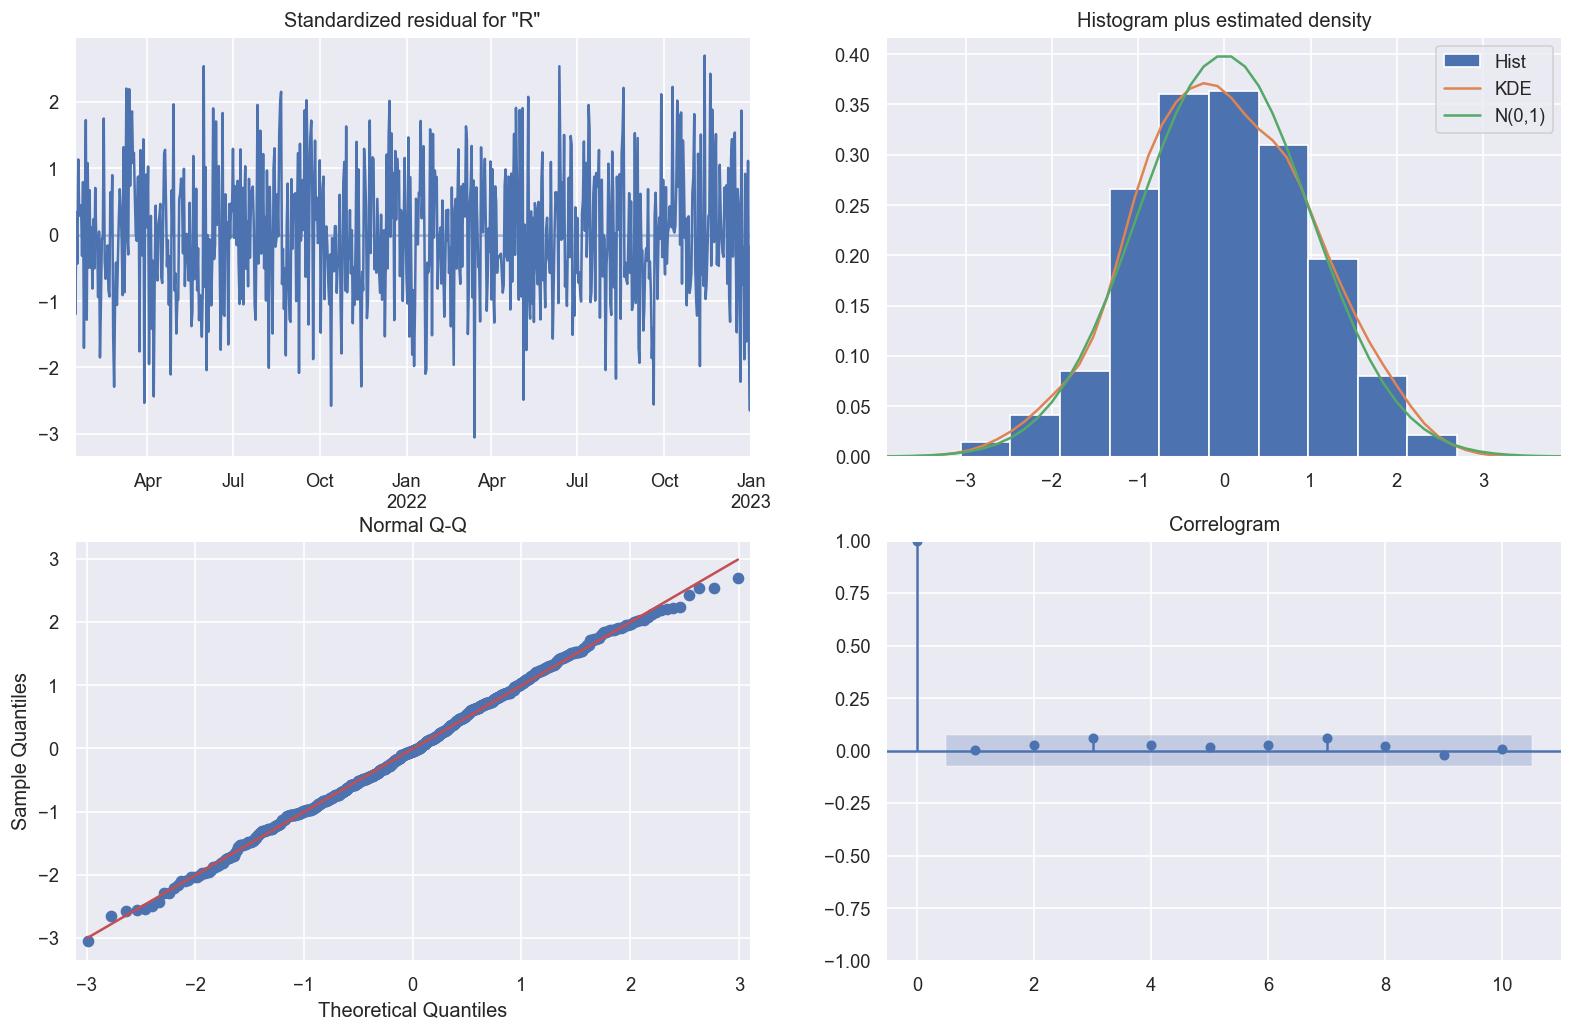

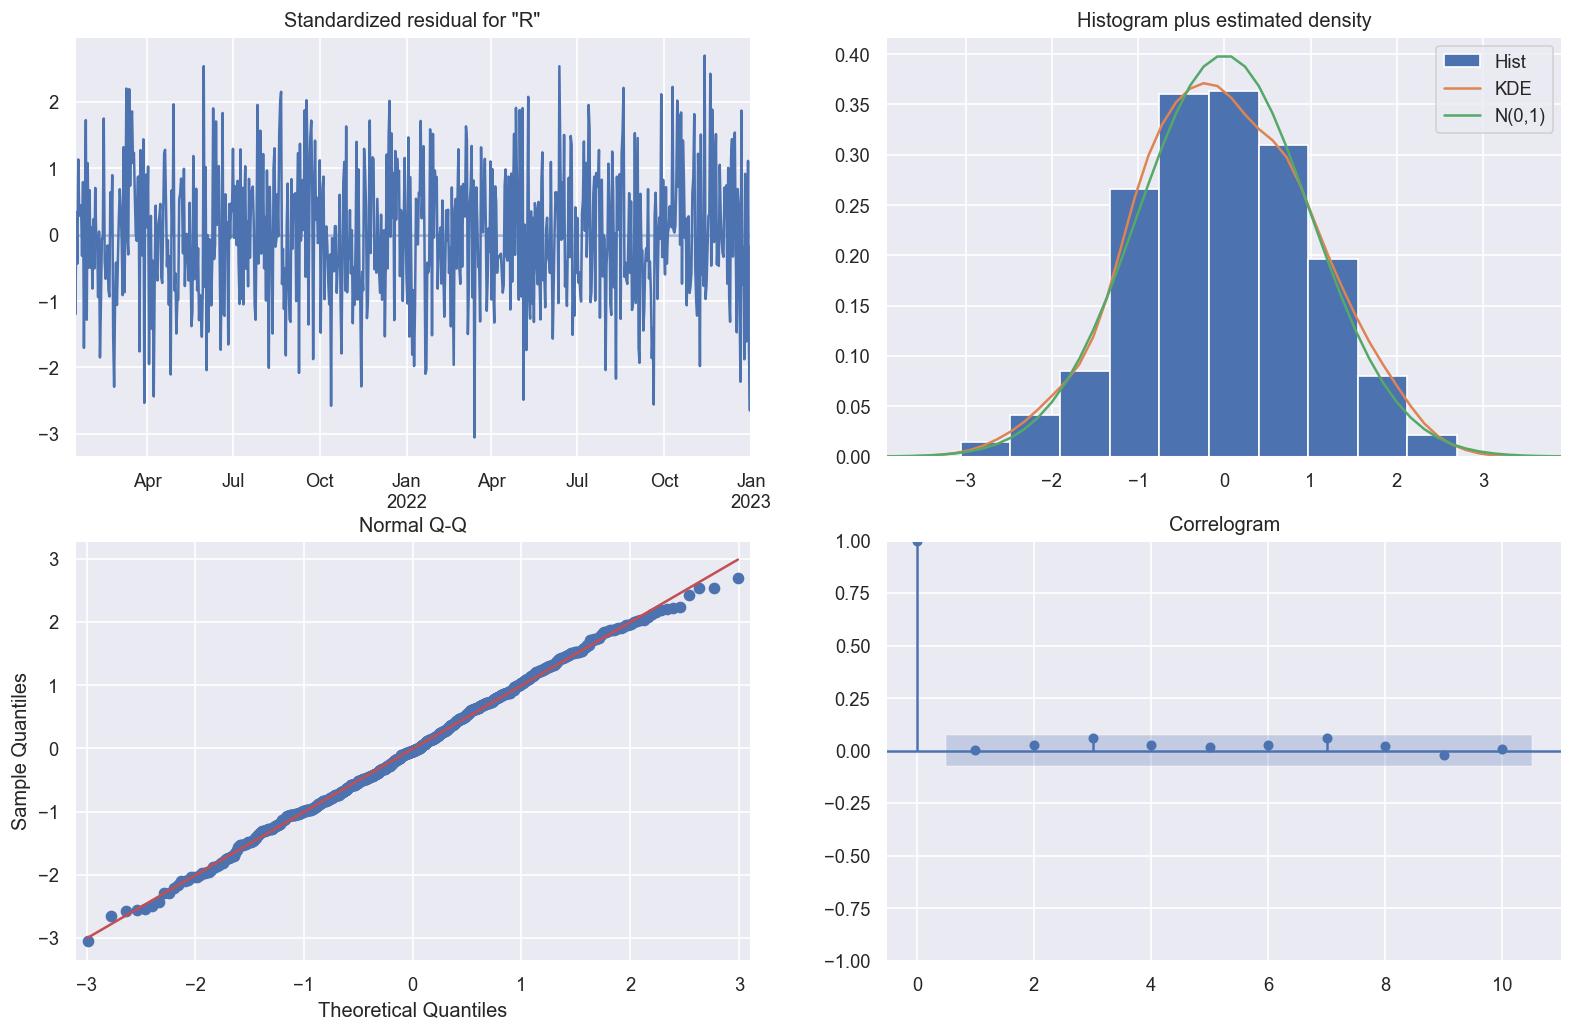

In [107]:
results.plot_diagnostics(figsize=[16,10])

In [108]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                          Revenue   No. Observations:                  731
Model:             ARIMA(1, 1, 0)x(5, 1, 0, 12)   Log Likelihood                -536.240
Date:                          Wed, 06 Mar 2024   AIC                           1086.481
Time:                                  15:45:43   BIC                           1118.516
Sample:                              01-01-2021   HQIC                          1098.850
                                   - 01-01-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4778      0.034    -14.115      0.000      -0.544      -0.411
ar.S.L12      -0.8593      0.039    -22.156      0.000      -0.935      -0.783
ar.S.L24      -0.7060      0.052    -13.602      0.000      -0.808      -0.604
ar.S.L36      -0.4675      0.058     -8.085      0.000      -0.581      -0.354
ar.S.L48      -0.3023      0.050     -6.028      0.000      -0.401      -0.204
ar.S.L60      -0.1678      0.039     -4.318      0.000      -0.244      -0.092
sigma2         0.2561      0.015     17.420      0.000       0.227       0.285
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.96   Prob(JB):                         0.34
Heteroskedasticity (H):               1.09   Skew:                            -0.00
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **Evaluation Metrics**

In [109]:
from sklearn.metrics import r2_score

In [110]:
#generate and display r2_score function results

df['predicted_revenue'] = prediction
print('R^2 for original data: ', r2_score(df['Revenue'], df['predicted_revenue']))

X_train['predicted_revenue'] = prediction
print('R^2 for training data: ', r2_score(X_train['Revenue'], X_train['predicted_revenue']))

X_test['predicted_revenue'] = prediction
print('R^2 for testing data: ', r2_score(X_test['Revenue'], X_test['predicted_revenue']))

R^2 for original data:  0.9825082975864294
R^2 for training data:  0.9807146728568572
R^2 for testing data:  0.9414089387470044


In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
mse = mean_squared_error(df['Revenue'], prediction[:len(df)])
mse_train = mean_squared_error(X_train['Revenue'], prediction[:len(X_train)])
mse_test = mean_squared_error(X_test['Revenue'], prediction[len(X_train):])
print("Mean Squared Error (MSE) on data: ", mse)
print("Mean Squared Error (MSE) on training set:", mse_train)
print("Mean Squared Error (MSE) on testing set:", mse_test)

Mean Squared Error (MSE) on data:  0.259271963534594
Mean Squared Error (MSE) on training set: 0.2527672605208619
Mean Squared Error (MSE) on testing set: 0.3038956250696593


## **Generate Predictions**

In [100]:
from statsmodels.tsa.arima.model import ARIMA

In [113]:
diff_forecast = results.get_forecast(steps=30)
mean_forecast = diff_forecast.predicted_mean
confidence_intervals = diff_forecast.conf_int()

lower_limits = confidence_intervals.loc[:, 'lower Revenue']
upper_limits = confidence_intervals.loc[:, 'upper Revenue']

prediction = results.get_prediction(start=len(df), end=len(df)+90)
mean_prediction = prediction.predicted_mean

confidence_intervals = prediction.conf_int()
lower_limits = confidence_intervals.loc[:, 'lower Revenue']
upper_limits = confidence_intervals.loc[:, 'upper Revenue']

#display tial of mean predition
mean_prediction.tail(30)


2023-03-04    19.100638
2023-03-05    19.179245
2023-03-06    19.291481
2023-03-07    19.174395
2023-03-08    19.198138
2023-03-09    19.384717
2023-03-10    19.319920
2023-03-11    19.560551
2023-03-12    19.593848
2023-03-13    19.550976
2023-03-14    19.700861
2023-03-15    19.654244
2023-03-16    19.298278
2023-03-17    19.512874
2023-03-18    19.581622
2023-03-19    19.567884
2023-03-20    19.489987
2023-03-21    19.815066
2023-03-22    19.711943
2023-03-23    19.897044
2023-03-24    20.056960
2023-03-25    20.103664
2023-03-26    20.221549
2023-03-27    20.161119
2023-03-28    19.810484
2023-03-29    20.022815
2023-03-30    20.119597
2023-03-31    20.079046
2023-04-01    20.038105
2023-04-02    20.362162
Freq: D, Name: predicted_mean, dtype: float64

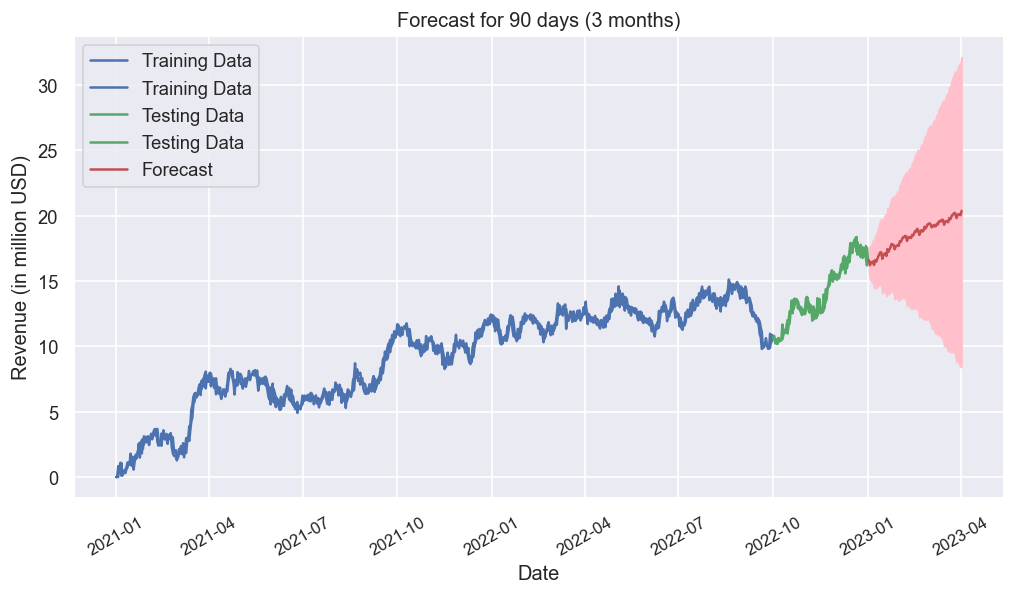

In [114]:
#display training, testing, and forecast

plt.figure(figsize=(10,5))
plt.plot(X_train, label='Training Data', color='b')
plt.plot(X_test, label='Testing Data', color='g')
plt.plot(mean_prediction, label='Forecast', color='r')

plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.title('Forecast for 90 days (3 months)')
plt.xlabel('Date')
plt.ylabel('Revenue (in million USD)')
plt.xticks(rotation=30, fontsize=10)

plt.legend(loc='upper left')
plt.show()

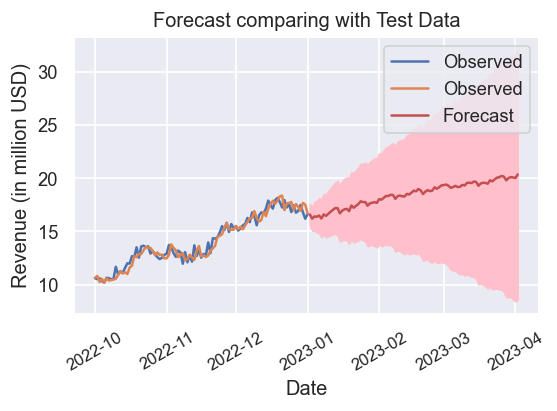

In [117]:
#display training, testing, forecast, and confidence intervals

plt.plot(X_test.index, X_test, label='Observed')
plt.plot(mean_prediction.index, mean_prediction, color='r', label='Forecast')
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.title("Forecast comparing with Test Data")
plt.xlabel('Date')
plt.ylabel('Revenue (in million USD)')
plt.xticks(rotation=30, fontsize=10)
plt.legend()
plt.show()